In [4]:

#%% 1c) Have while loops do something useful with linear algebra:
import numpy as np # Import numpy to work with matrices

    #Let's recall that the dot product between two vectors is 0, if the vectors are orthogonal.
#You can check this here:
# dot product = m1 * m2 * cos(angle2) %Result of trig identities

# Solve this for angle between:
vec1 = np.array([0,0.5])  # vector v
vec2 = np.array([1,1])  # vector u
magVec1 = np.sqrt(vec1[0]**2 + vec1[1]**2) # magnitude of vector 1
magVec2 = np.sqrt(vec2[0]**2 + vec2[1]**2) # magnitude of vector 2
dotProduct = np.dot(vec1,vec2) # Using a function to take the dot product
angleBetween = np.degrees(np.arccos(dotProduct/(magVec1*magVec2))) # What is the angle between the vectors? Take the inverse cosine then convert to degrees
print('Angle between vectors is:', angleBetween, 'degrees')


Angle between vectors is: 45.00000000000001 degrees


In [5]:
#Suggestion for exploration: Do this for other vectors to see if you get other angles
    
#%% If the dot product between two vectors is 0, the vectors are orthogonal
# How easy is it to find orthogonal vectors randomly - how rare are orthogonal vectors?
# Let's find 10 orthogonal vectors by random trial and error

orthoCounter = 1 # This is our counter of orthogonal vectors
loopCounter = 0 # This counts the number of loops it took to get them
numOrthoVectors = 10 # How many orthogonal pairs do we want to draw?
epsilon = 0.00001 #How close is close enough to 0? (In terms of the dot product)
rowContainer = np.empty([numOrthoVectors,2]) # Preallocate the row vector container
columnContainer = np.empty([numOrthoVectors,2]) # Preallocate the column vector container
while orthoCounter < (numOrthoVectors + 1): # We don't know how many tries we 
# need, so while is suitable
    A = np.random.normal(0,1,2) # Draw a row vector randomly from a normal distribution
    # (Reminder: Mean is 0, SD is 1, number of numbers is 2)
    B = np.random.normal(0,1,2) # Draw a column vector randomly from a normal distribution
    testThem = np.dot(A,B.T) # Take the inner product
    loopCounter = loopCounter + 1 # Increment the loopCounter
    if abs(testThem) < epsilon: # Ideally, we want dot products that are exactly 0, 
    # due to Python's numerical precision, this will never happen, so we need 
    # to check for close enough to zero. 
        print('Orthogonal!') # Expression of joy
        rowContainer[orthoCounter-1,:] = A # Capture the row vector
        columnContainer[orthoCounter-1,:] = B # Capture the column vector
        orthoCounter = orthoCounter + 1 # increment the orthoCounter
print('It took ',loopCounter, 'repeats to find 10 orthogonal vectors') # Wow

Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
Orthogonal!
It took  1230909 repeats to find 10 orthogonal vectors


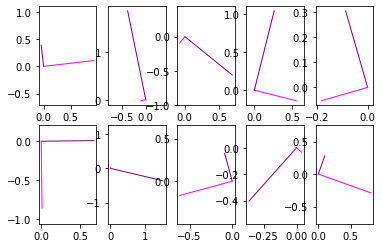

In [6]:
#Suggestion for exploration: Try different values of epsilon

#%% Now that we found them, let's plot them
import matplotlib.pyplot as plt # Import Matlab plotting library
plt.plot() # Unless you call this explicitly and there is not one open, it 
# will open one for you. Here, it is good to open one explictly
# If you have more than one figure you draw to, it helps to open new figures
for ii in range(numOrthoVectors):
    ax = plt.subplot(2,5,ii+1) #Create a subplot and name it "ax", so we can reference it later
    plt.plot([0,rowContainer[ii,0]],[0,rowContainer[ii,1]],color='purple',linewidth=1) #Plot vector 1
    plt.plot([0,columnContainer[ii,0]],[0,columnContainer[ii,1]],color='magenta',linewidth=1) #Plot vector 2
    ax.axis('equal') #Set aspect ratio to equal. If you don't do this, angles will be orthogonal, but not look like it

My mind is unchanged


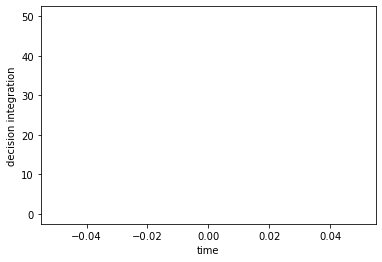

Trending to change my mind


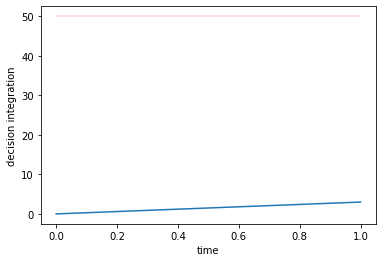

Trending to change my mind


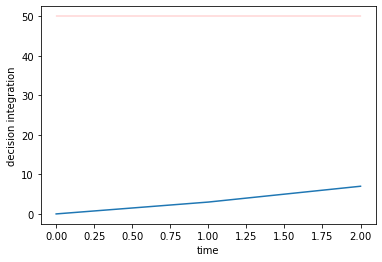

Trending to change my mind


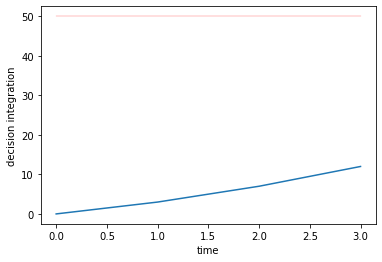

Trending to change my mind


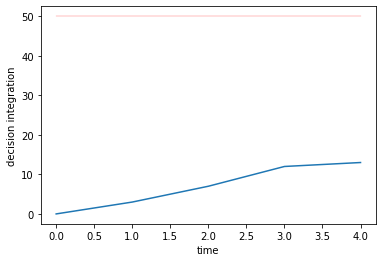

Trending to change my mind


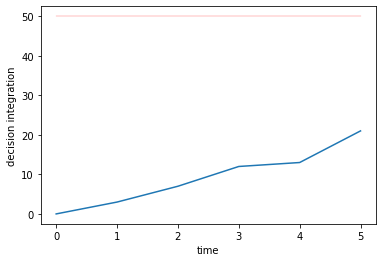

Trending to change my mind


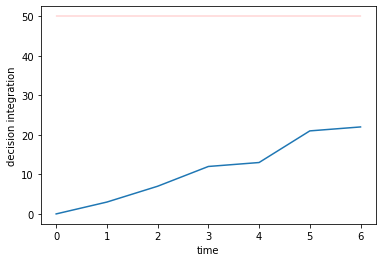

Trending to change my mind


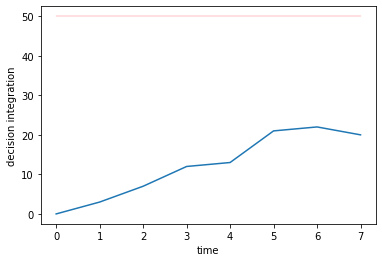

Trending to change my mind


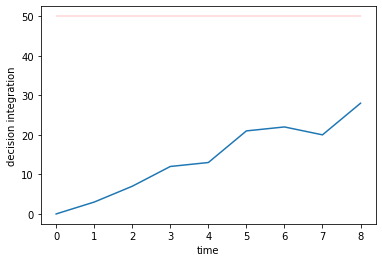

Trending to change my mind


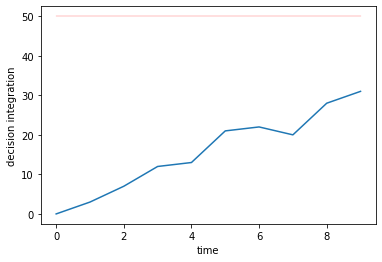

Trending to change my mind


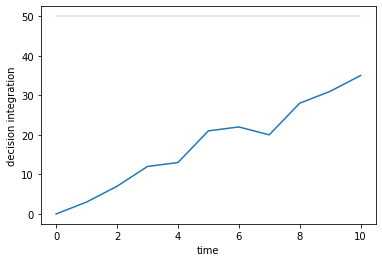

Trending to change my mind


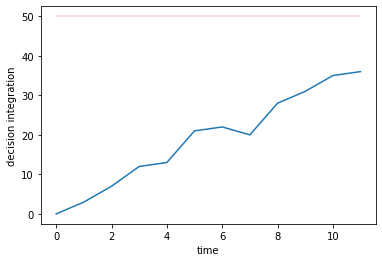

Trending to change my mind


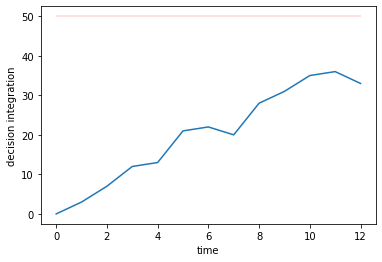

Trending to change my mind


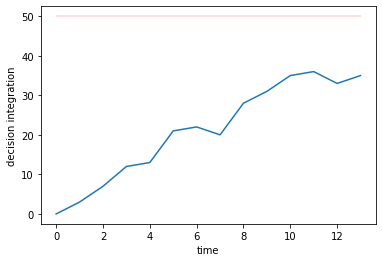

Trending to change my mind


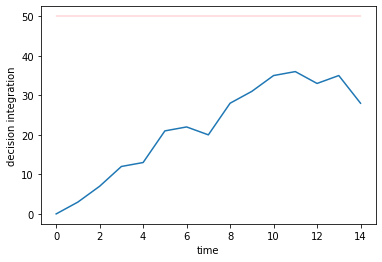

Trending to change my mind


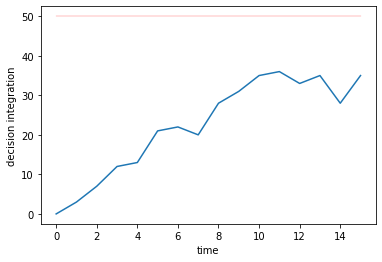

Trending to change my mind


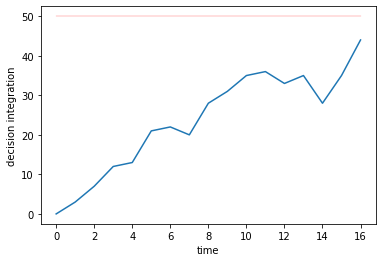

Trending to change my mind


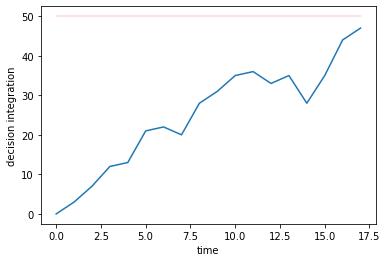

Trending to change my mind


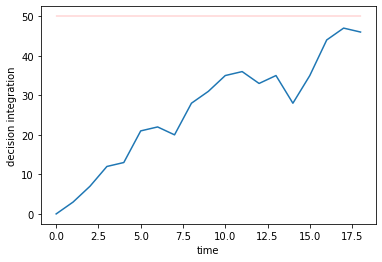

Trending to change my mind


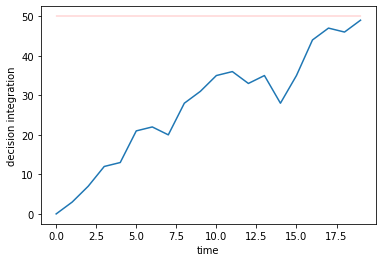

Changed my mind!


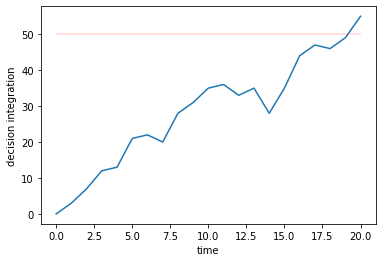

In [8]:
#%% 2) If-else statements

# Pure if statements check only one thing. If/else statements check one
# condition *after* another. Possibility for logical mistake: If you always
# check in a certain order, the later checks will never be executed. We
# won't get there. Because the if-statement was already exited by previous
# condition being true. The if/else statement is exited as soon as *one*
# condition is true.

# Let's practice this with an example of human decision-making
# In our case, let's see how long it takes someone to change their mind
# about legalizing gambling
# Specifically, we are going to simulate both positive and negative info
# which together with "ad campaigns" will change the mind of the person

# 1. Initialize parameters:
decisionThreshold = 50 # The (arbitrary) point at which the person changes their mind
startingPosition = 0 # Our starting position
adCampaign = 1 # If we run an ad compaign, we can change their mind
maxTimeWindow = 1000 # max time (arbitrary amount) that we allow them to change their mind
mindChanged = 0 # This variable will represent whether they changed their mind
time = np.array([]) # This is where we keep track of timeCounter
state = np.array([]) # This is where we keep track of currentState 

# 2. Run simulation:
timeCounter = 0 # Start the clock at 0
currentState = startingPosition # Let's start with a reasonable starting point
plt.figure() #Open figure
while mindChanged == 0: # We want to measure time until the person changes their mind, so we run a loop that keeps going as long as the decision is unchanged
    # Each time going through the loop, we update the current state with
    # a new number. This is going to be somewhat artificial but not
    # entirely. There are lots of things going on that could change it.
    if currentState > decisionThreshold: # First, we check if the current state exceeds the decision threshold
    # If it does, we execute these commands - set mind changed state to 1,
    # which stops the loop and output that to the command line
        mindChanged = 1 # Now we change our mind!
        print('Changed my mind!')
    elif currentState > startingPosition: # If we didn't change their mind, we check if the starting position is larger than the current state
        # If so, we say that the person is trending to change their mind
        print('Trending to change my mind')
    elif currentState < startingPosition: # If they are not in a trending state, we check if it is below the starting position
        # If it is, we say that they are turned off from changing their mind
        print('Turned off')
    else: # If none of the other conditions is met
        print('My mind is unchanged') 
    if timeCounter > maxTimeWindow: # If they never change their mind
        print('My mind will not change. Are you sure you can convince me?') #Diamond hands, I guess?
        break # Terminate the while loop
    time = np.append(time,timeCounter) # Append timeCounter to time
    state = np.append(state,currentState) # Append currentState to state
    plt.plot(time[:],state[:]) # Plot the current state over time as we go
    plt.plot([0,timeCounter],[decisionThreshold,decisionThreshold],color='red',linewidth=0.25) # draw decision threshold as a line
    plt.xlabel('time') # arbitrary time units
    plt.ylabel('decision integration')  #Make sure to watch the plots evolve as this runs
    plt.show()
    plt.pause(.01) # in seconds - this is 10ms
    # Simulating ad campaign - it usually goes up, but it could go
    # down, because there are other things going on
    positiveInfo = np.random.randint(1,11,1) # This draws one random integer from 1 to 10, out of a virtual hat.
    negativeInfo = np.random.randint(1,11,1) # Same. For balance.
    integratedDecision = positiveInfo - negativeInfo + adCampaign # This allows for negative numbers which makes it more realistic. People receive both positive and negative information
    currentState = currentState + integratedDecision # Update the current state
    timeCounter = timeCounter + 1 # 1 unit of time passes

# Suggestion for exploration: Change the values for adCampaign and/or the decisionThreshold to see how the result is affected

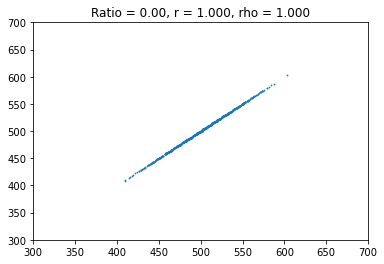

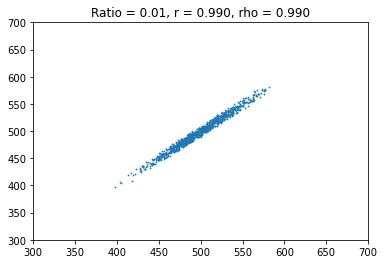

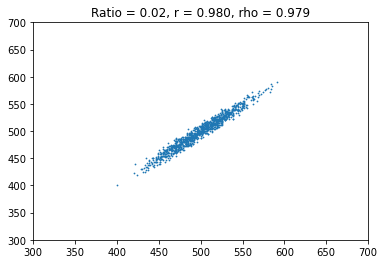

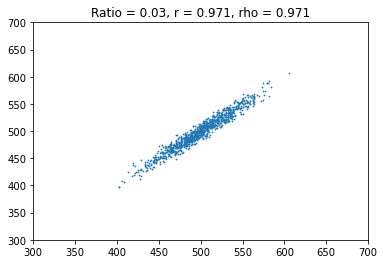

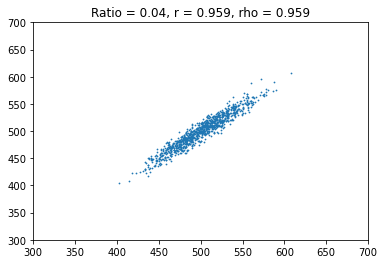

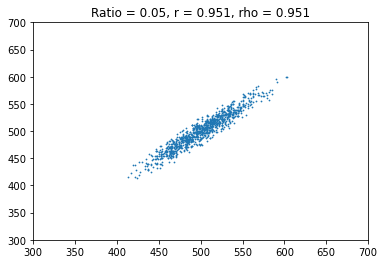

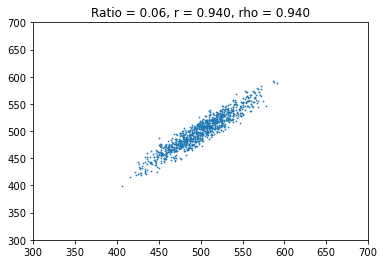

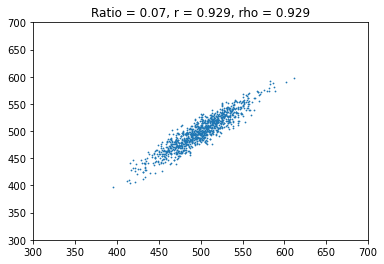

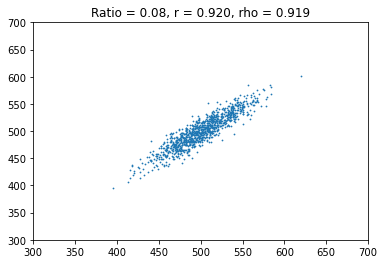

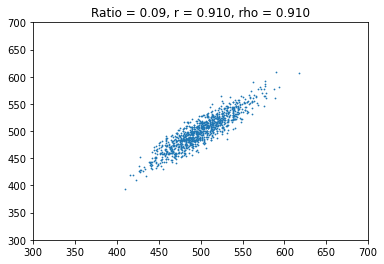

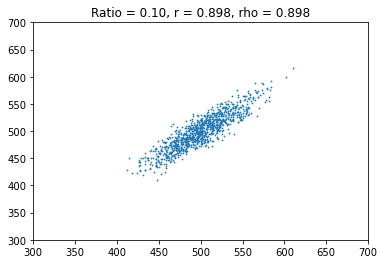

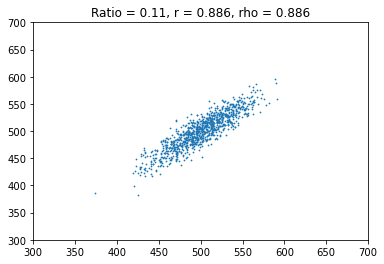

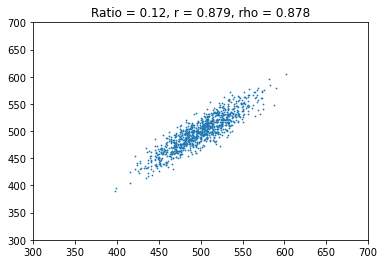

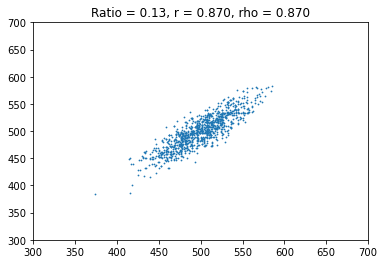

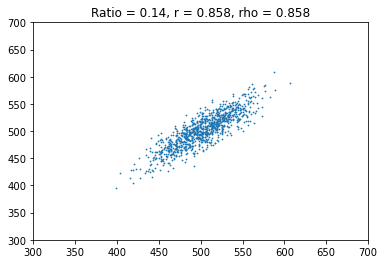

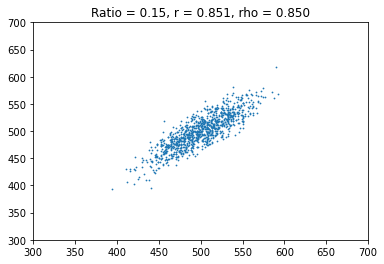

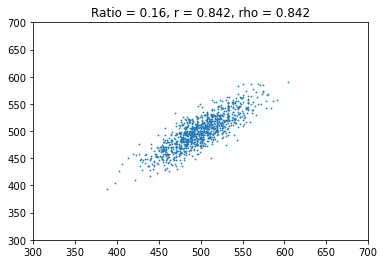

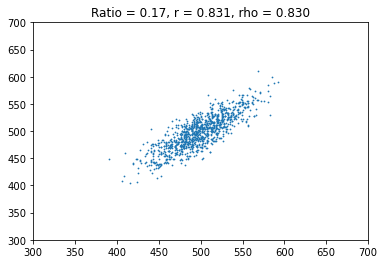

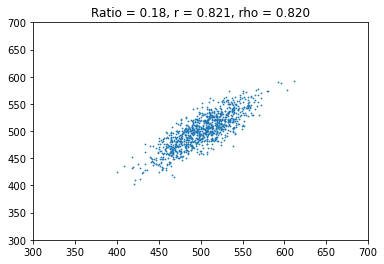

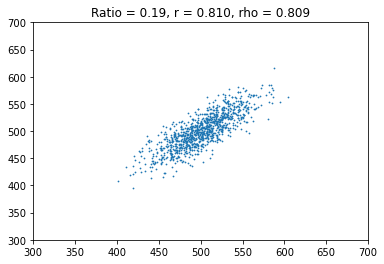

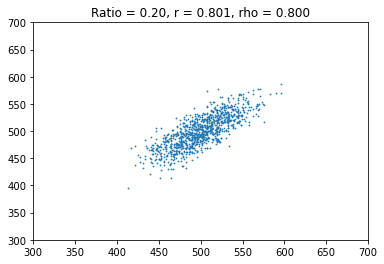

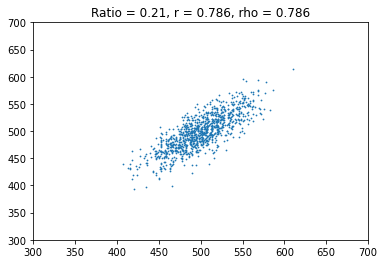

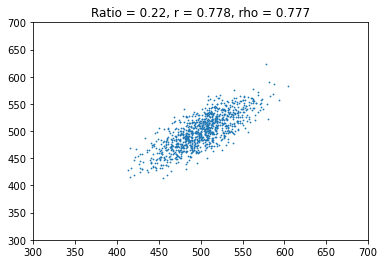

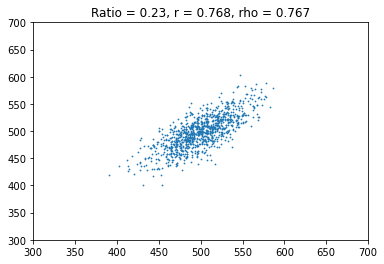

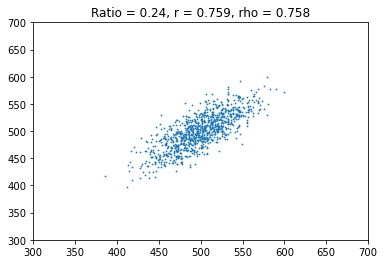

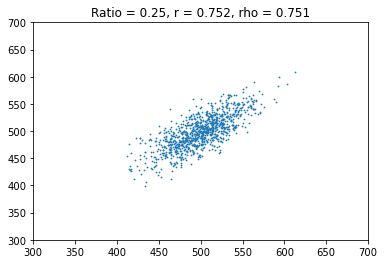

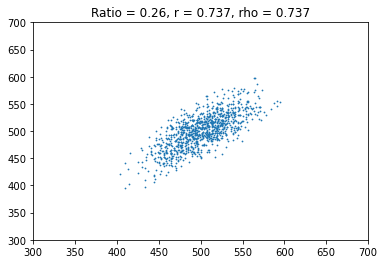

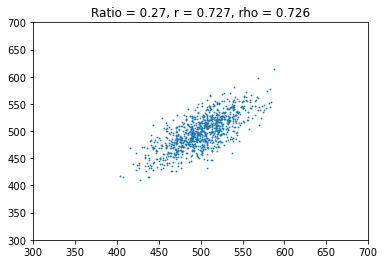

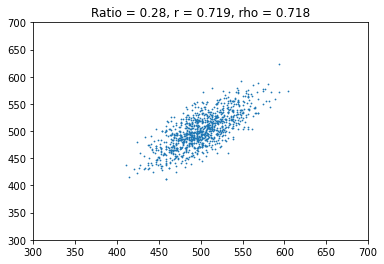

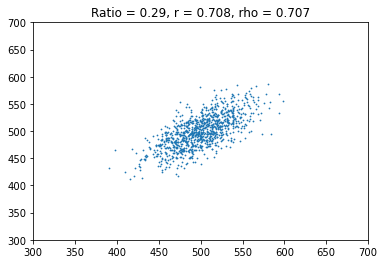

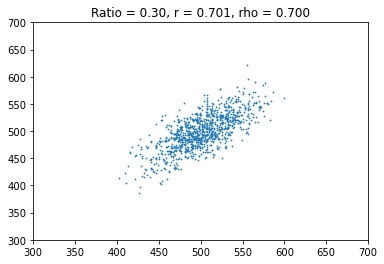

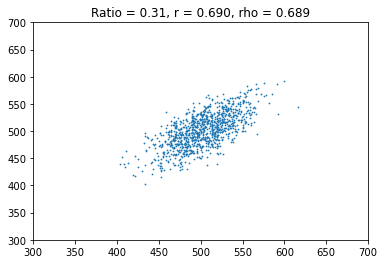

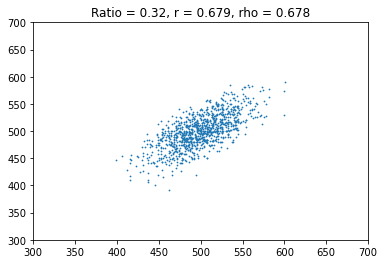

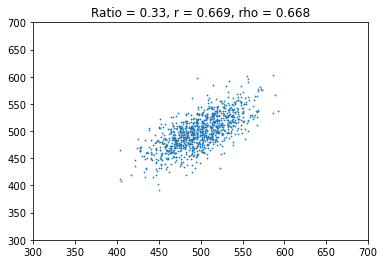

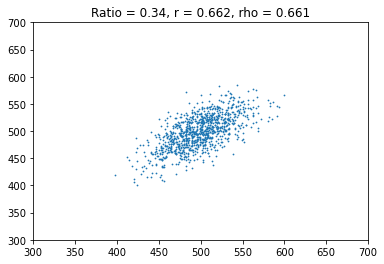

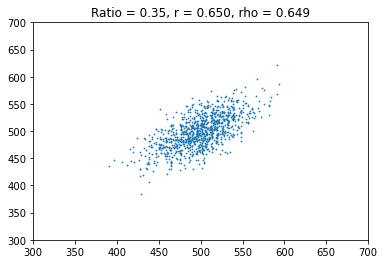

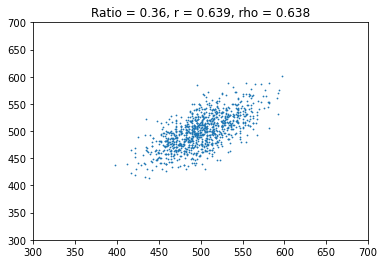

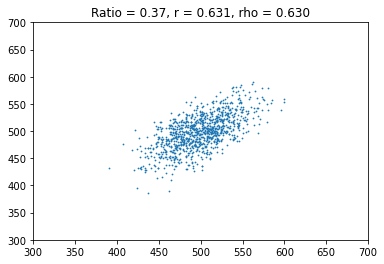

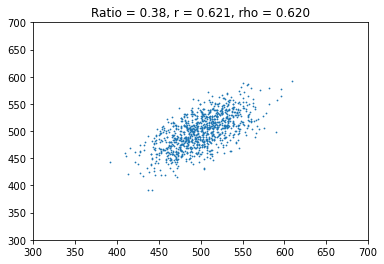

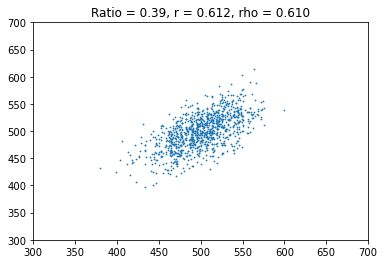

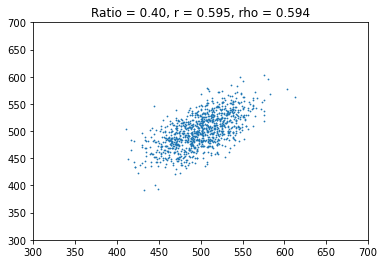

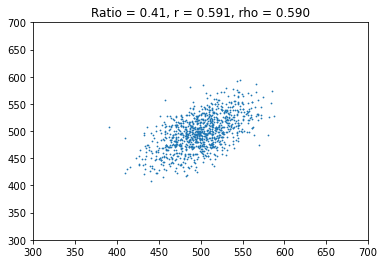

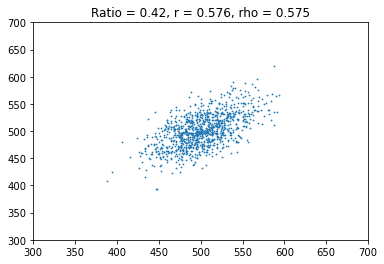

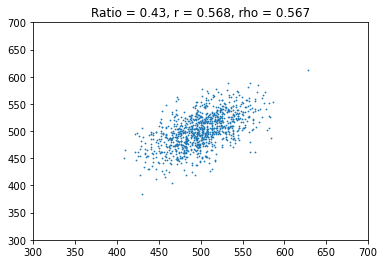

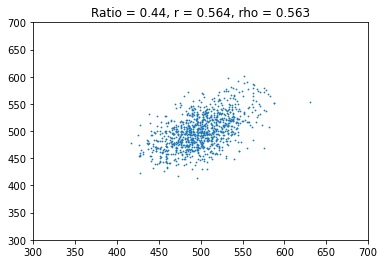

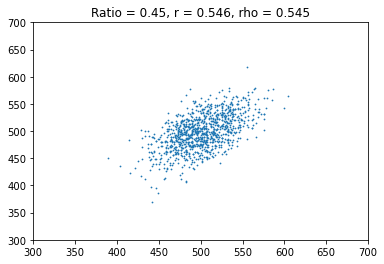

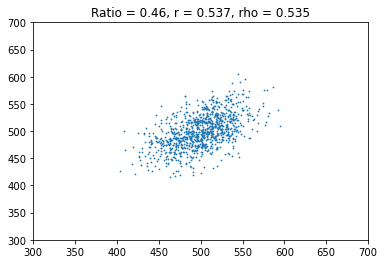

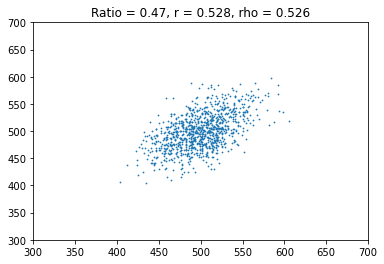

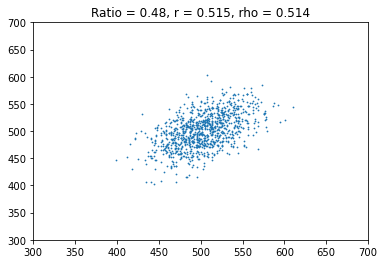

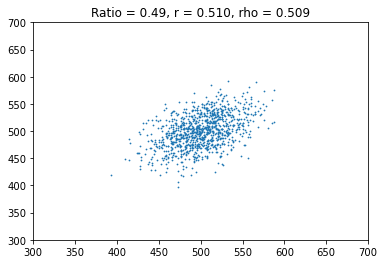

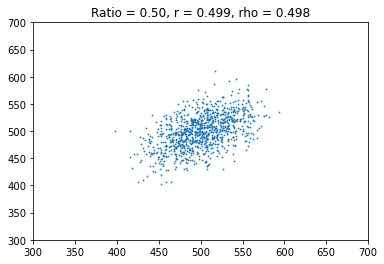

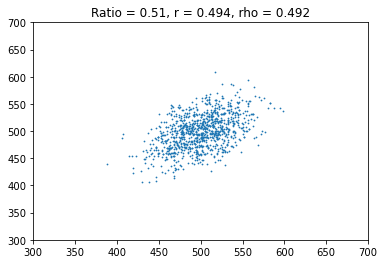

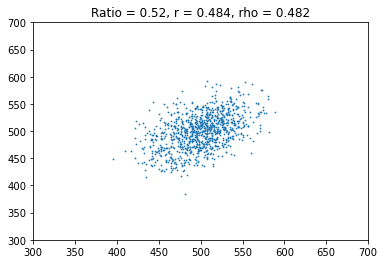

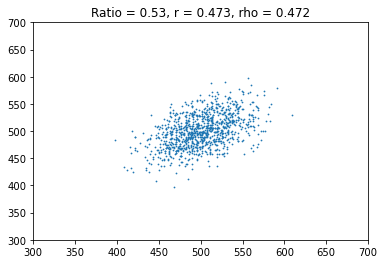

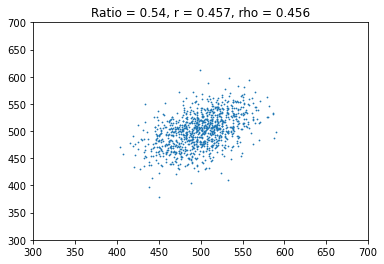

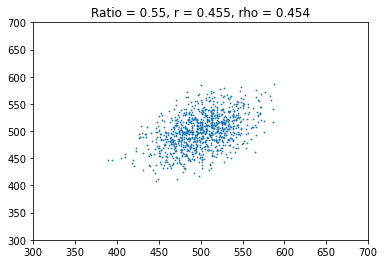

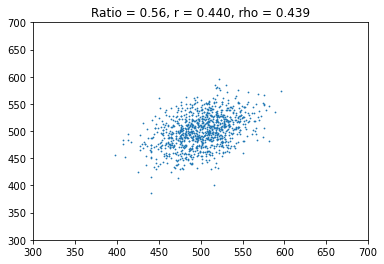

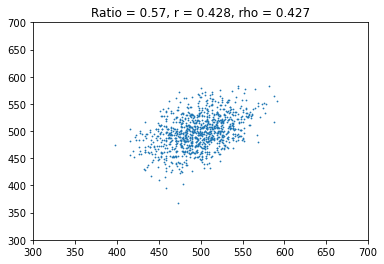

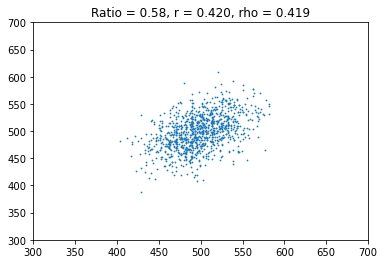

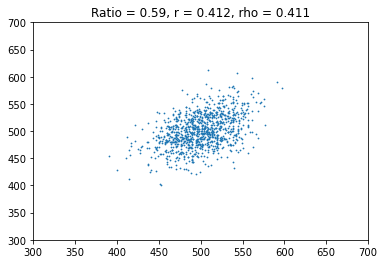

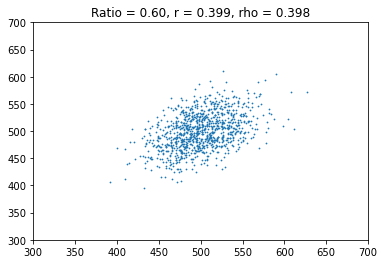

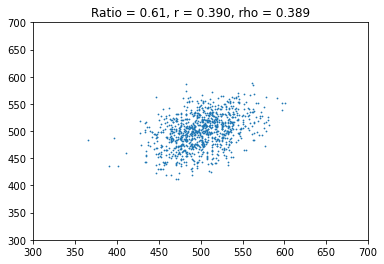

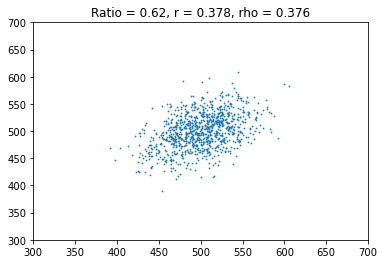

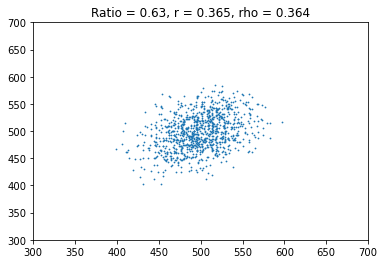

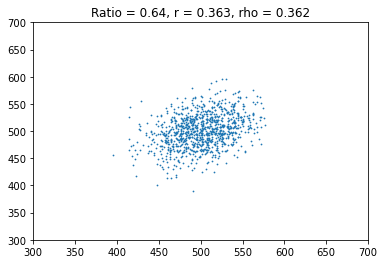

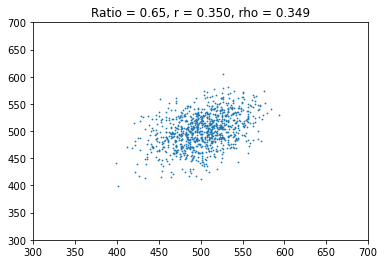

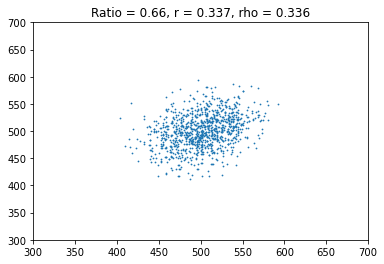

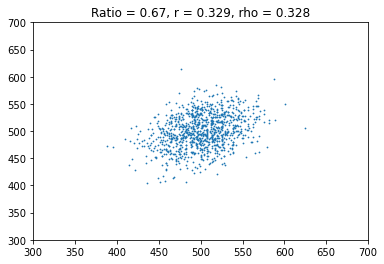

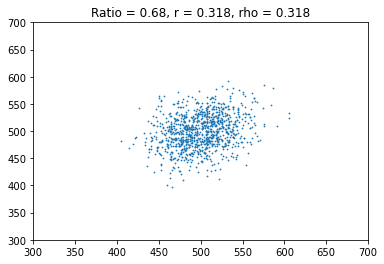

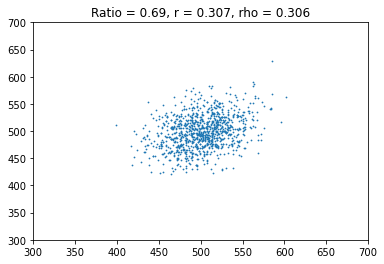

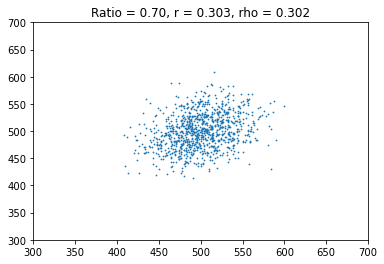

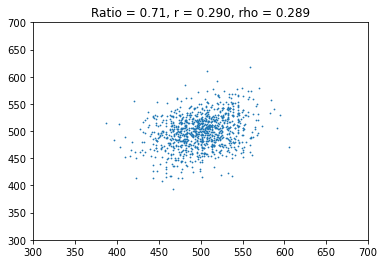

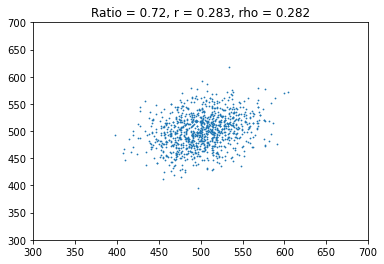

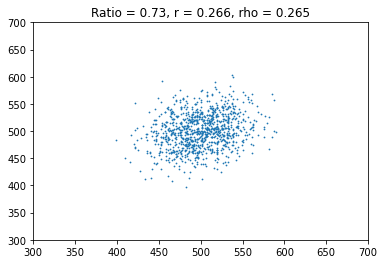

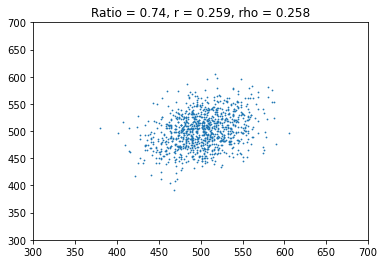

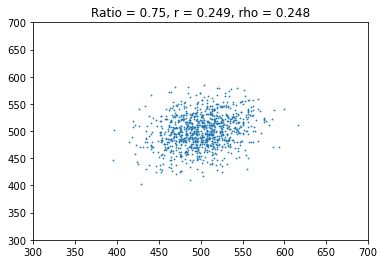

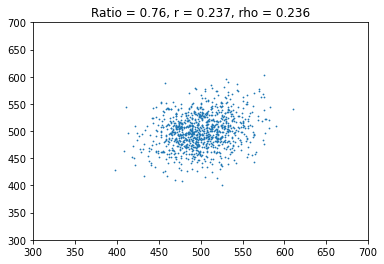

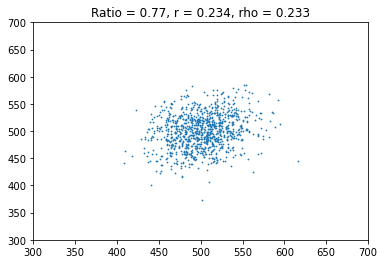

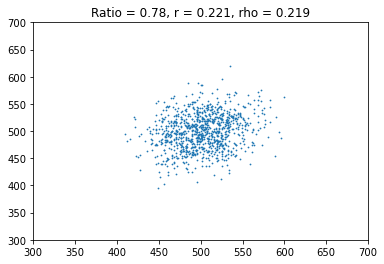

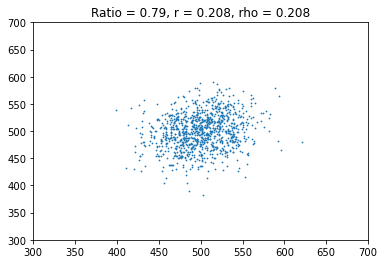

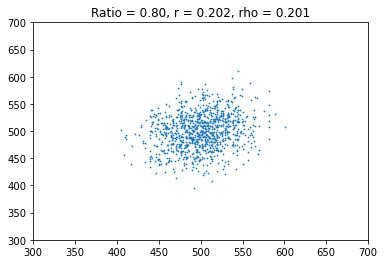

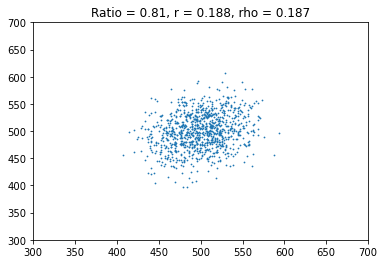

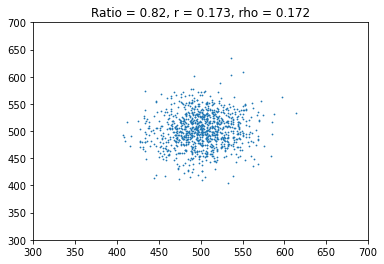

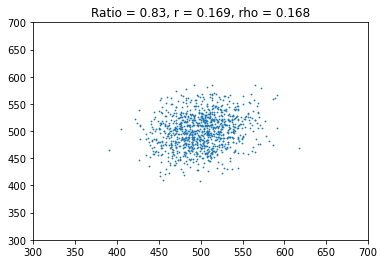

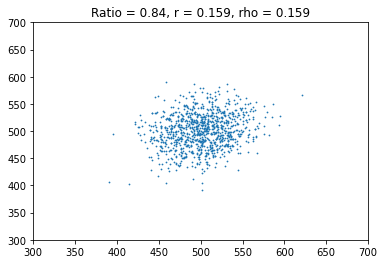

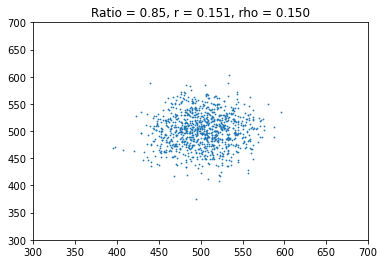

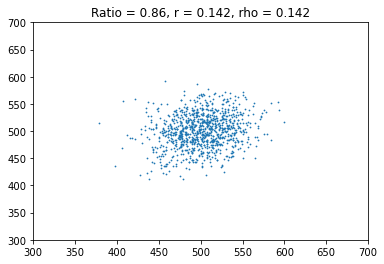

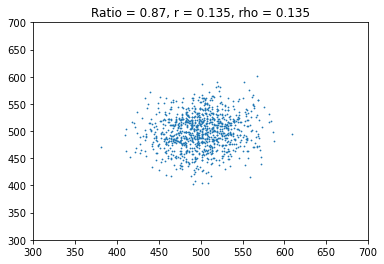

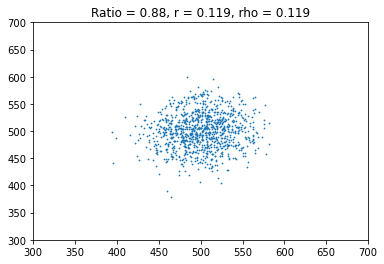

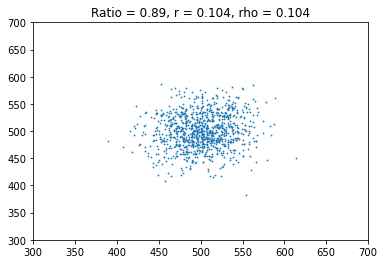

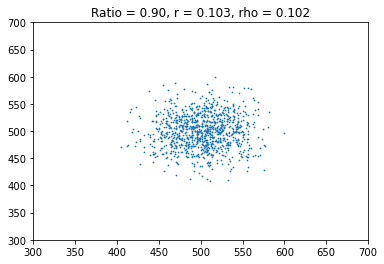

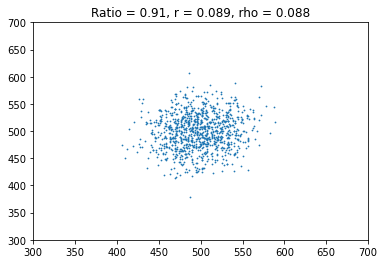

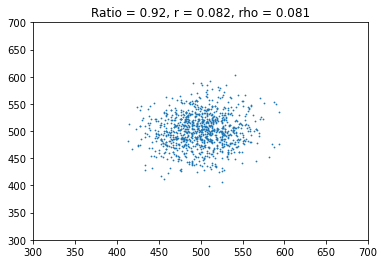

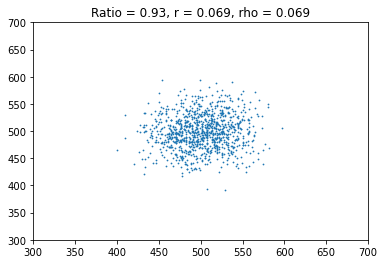

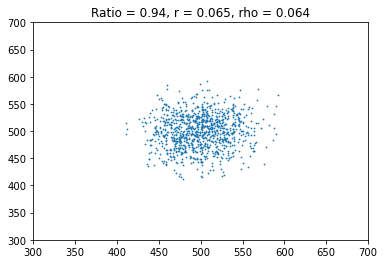

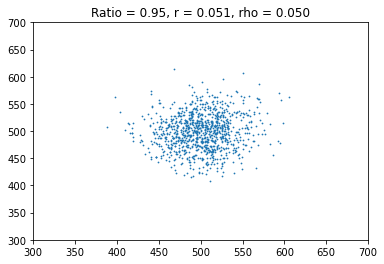

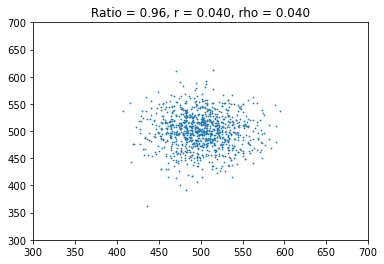

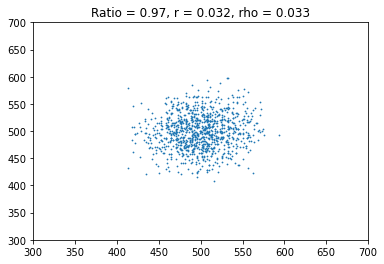

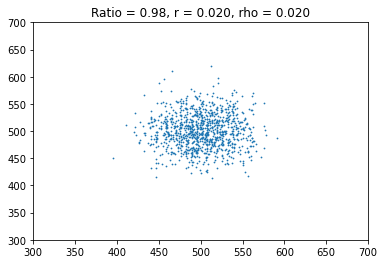

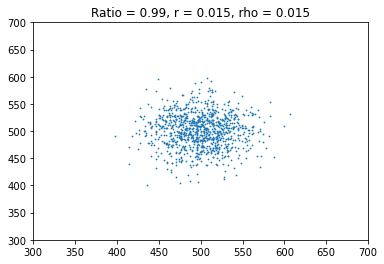

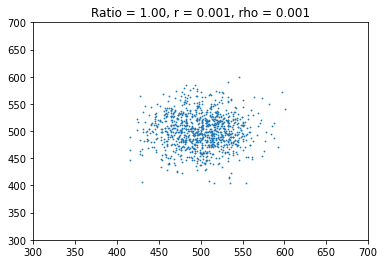

Text(0.5, 1.0, 'Ratio of r vs. rho as a function of increasing correlation')

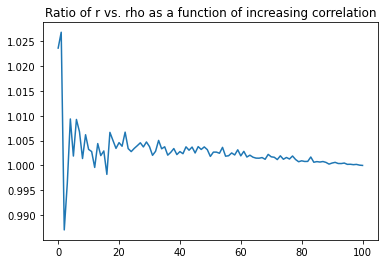

In [9]:
#%% 3 Correlation simulation 1: Aleatory calculations

# 0. Import libraries
from scipy import stats # We need scipy to compute Spearman's Rho (remember: numpy and matplotlib are already imported)
    
# 1. Initialize parameters:
numReps = 1000 # Number of experiment repeats (to see the average correlation)
numGears = 100 # We are looping through 1 to 100 gears
m = 10 # Number of mutually exclusive events (gear slots)
empVsExp = np.empty([numGears+1,4]) # Initialize container to store correlations: perfect world and simulation
empVsExp[:] = np.NaN # Convert to NaN
counter = 0 # Initialize counter
  
# 2. Run simulation:  
for c in range(numGears+1): # Loop through each gear (from 0 to 100)
    # Note: We add one to numGears so that we don't end at 99
    
    # Simulate aleatory observations:
    ratio = c/numGears # ratio of relative to total (proportion of gears in 2nd observation that change)
    # For each iteration as the ratio goes up the number of gears in the 2nd observation goes up
    observation1 = np.random.randint(m+1,size=(numGears,numReps)) # first observation - picking random numbers between 0 and 10
    observation2 = np.copy(observation1) # second observation - same as first
    observation2[0:c,:] = np.random.randint(m+1,size=(c,numReps)) # randomly change c gears in second observation
    
    # Compute Pearson R for each experimental repeat:
    temp = np.empty([numReps,1]) # initialize empty container to store each r value
    # We will compute 1000 of these per iteration of c
    temp[:] = np.NaN # convert to NaN
    for i in range(numReps): # Loop through each experimental repeat
        r = np.corrcoef(observation1[:,i],observation2[:,i]) # compute the Pearson R
        # Correlating the ith column of observations 1 + 2, for 1000 times total
        temp[i] = r[0,1] # store coefficient in temp variable
    
    # Compute Spearman Rho for each experimental repeat:
    temp2 = np.empty([numReps,1]) # initialize empty container to store each rho value
    temp2[:] = np.NaN # convert to NaN
    for i in range(numReps): # Loop through each experimental repeat 1 to 1000
        r = stats.spearmanr(observation1[:,i],observation2[:,i]) # Compute Spearman Rho
        temp2[i] = r[0] # store coefficient in temp2 variable
    
    # Store data:
    empVsExp[counter,0] = ratio
    empVsExp[counter,1] = np.mean(temp) # take mean R for all experimental repeats
    empVsExp[counter,2] = 1 - ratio
    empVsExp[counter,3] = np.mean(temp2) # take mean rho for all experimental repeats
    counter = counter + 1 # Increment the counter
    
    # Plot data:
    plt.plot(sum(observation1),sum(observation2),'o',markersize=.75)
    plt.title('Ratio = {:.2f}'.format(empVsExp[c,0]) + ', r = {:.3f}'.format(empVsExp[c,1]) + ', rho = {:.3f}'.format(empVsExp[c,3]))
    plt.xlim(300,700) # Hardcoding is quick but dirty
    plt.ylim(300,700)
    plt.pause(.01) # pause (in seconds) between iterations
    
#%% Ratio of R vs. Rho as a function of increasing correlation:
ascendingMatrix = np.flipud(np.copy(empVsExp)) # copy array and flip upside down
plt.plot(ascendingMatrix[:,1]/ascendingMatrix[:,3]) # Hint: It stabilizes - 
# run 2 more times to confirm this. More unstable at lower correlations, as ranks will jump more
plt.title('Ratio of r vs. rho as a function of increasing correlation')

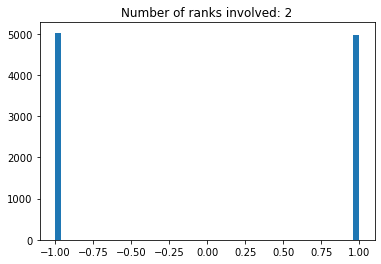

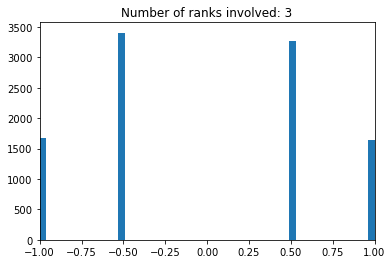

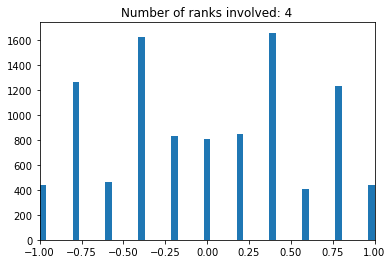

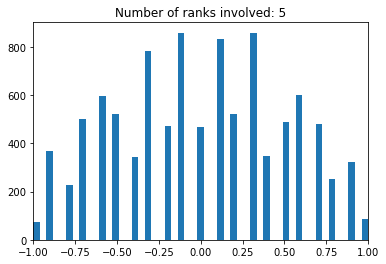

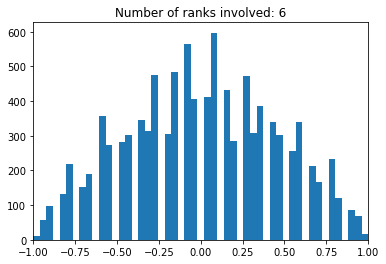

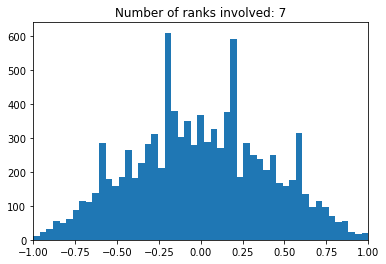

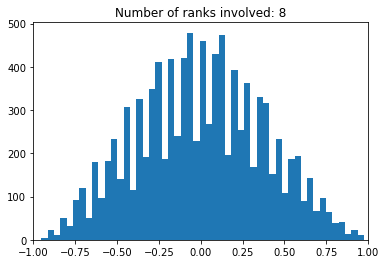

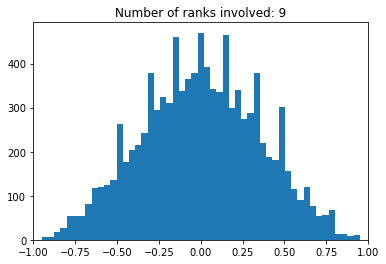

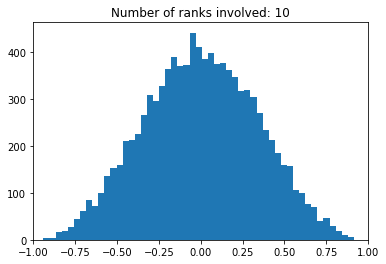

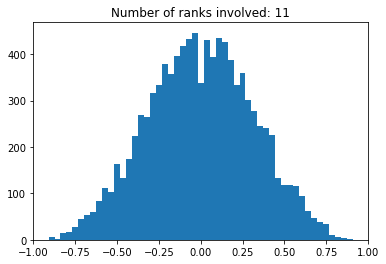

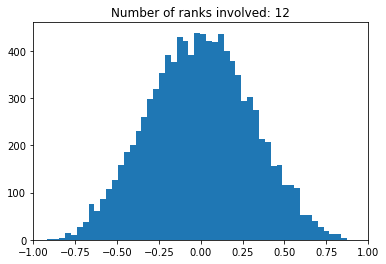

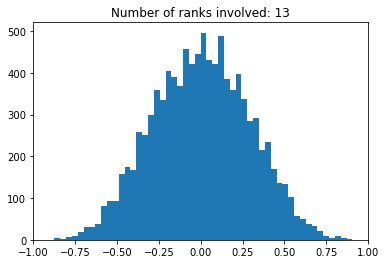

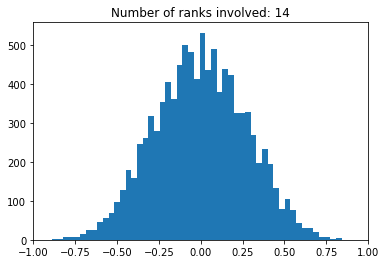

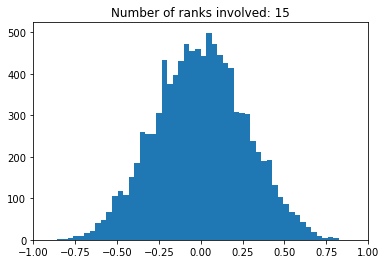

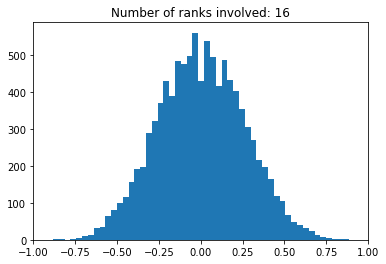

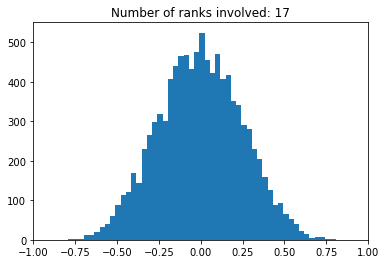

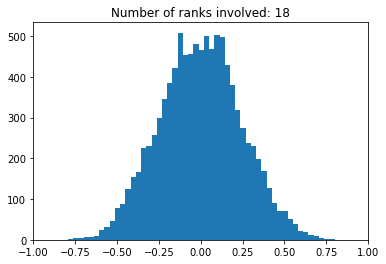

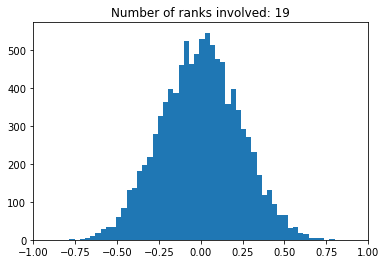

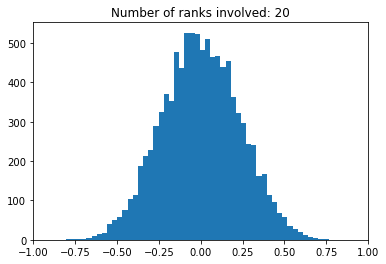

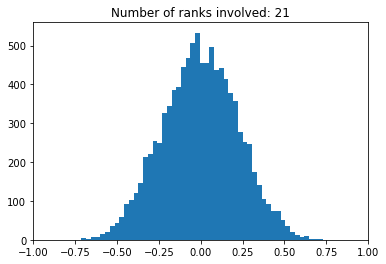

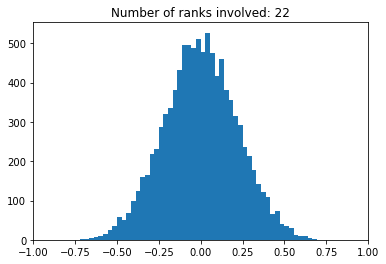

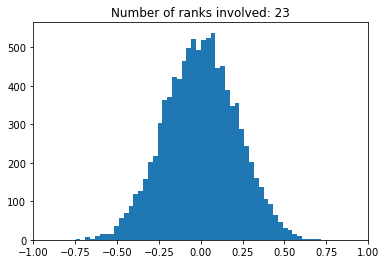

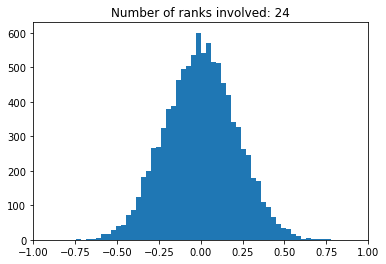

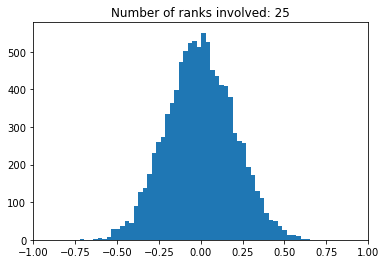

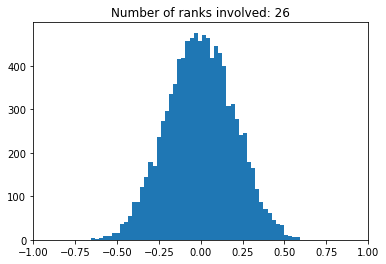

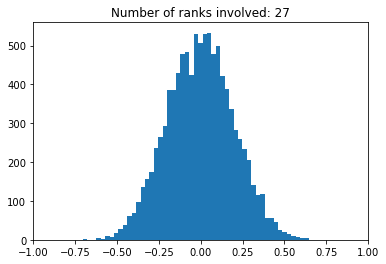

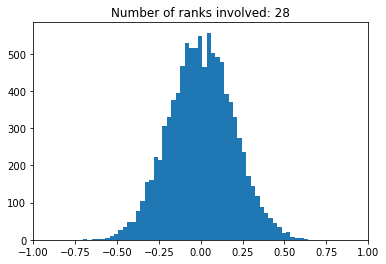

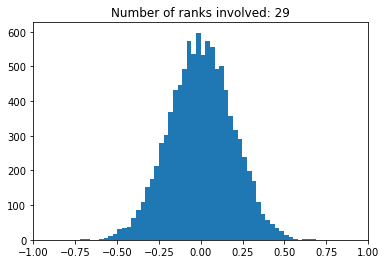

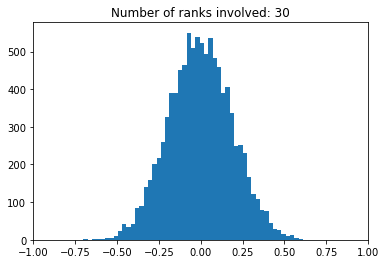

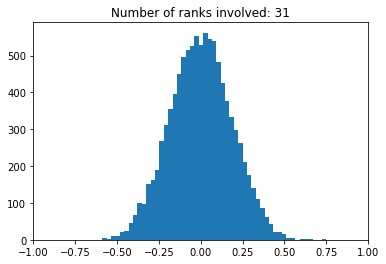

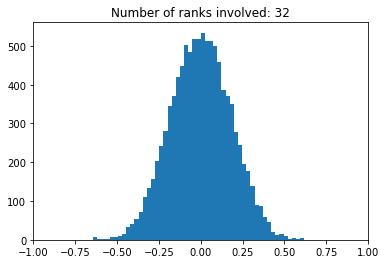

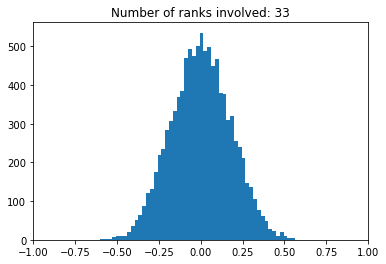

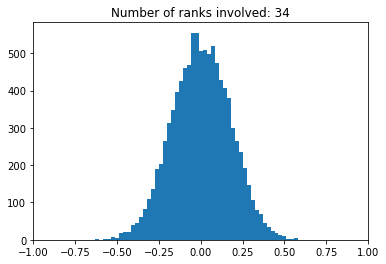

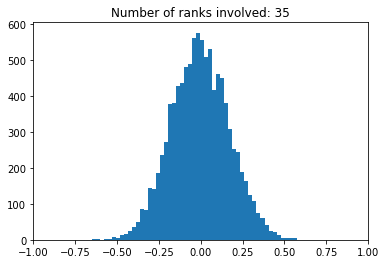

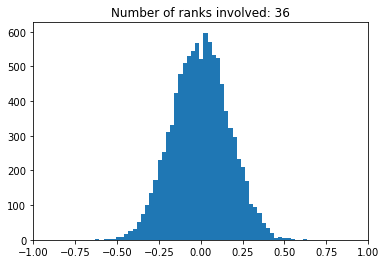

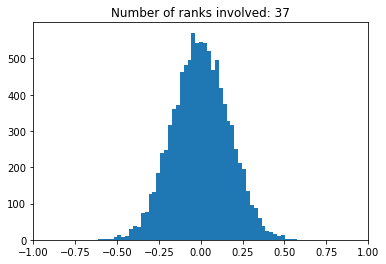

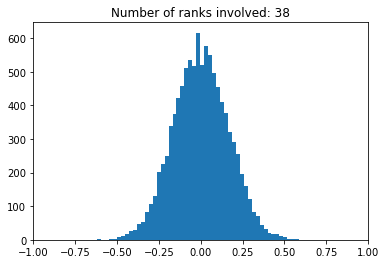

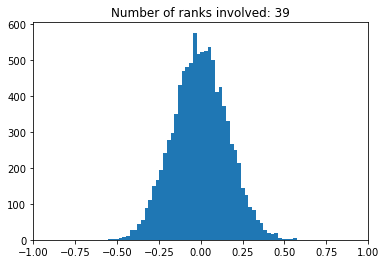

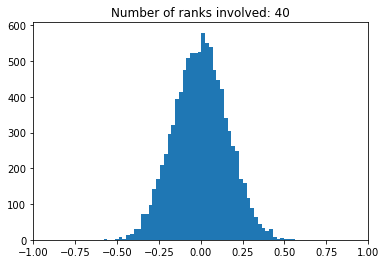

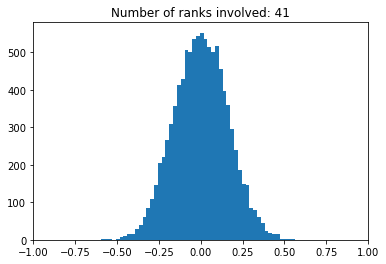

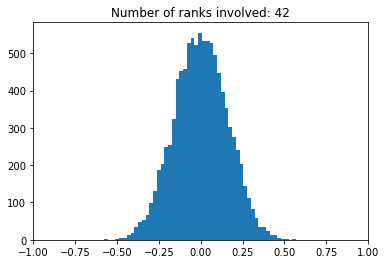

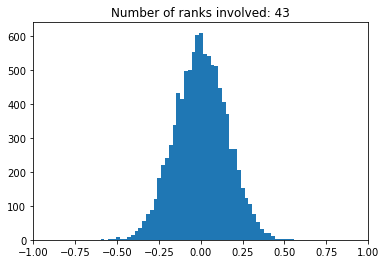

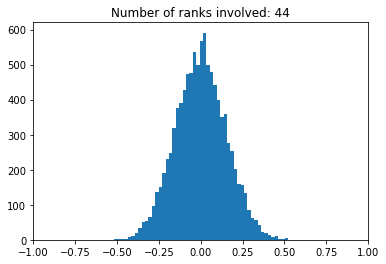

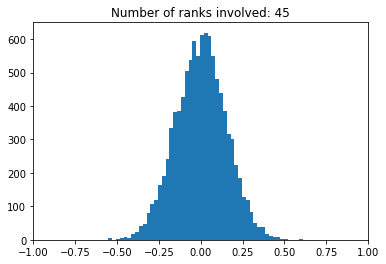

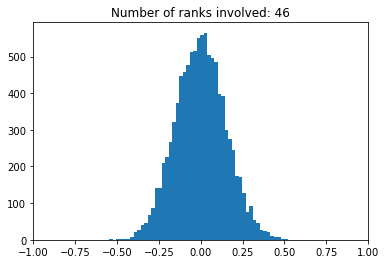

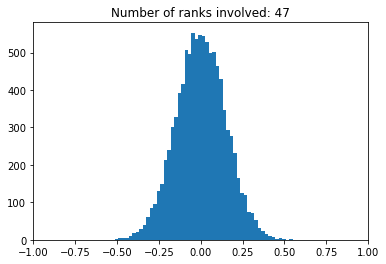

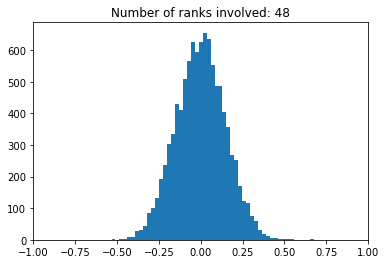

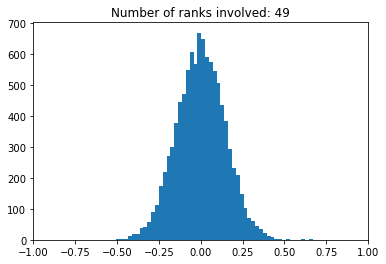

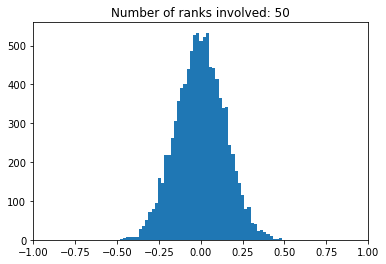

Text(0, 0.5, 'Correlation magnitude')

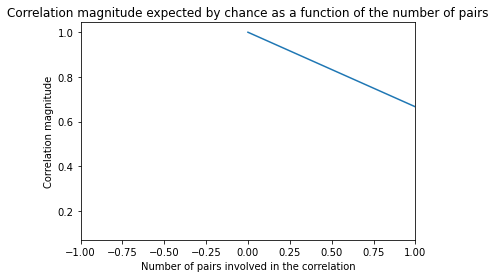

In [11]:
#%% 4) L-tier: Correlation simulation 2: What is going on with the spearman correlation by using random ranks
# Instead of using scipy let's manually compute Spearman's Rho. By hand. To understand it. Just this once.

# 1. Initialize variables:
scaleFactor = 6 # Try different ones to determine that it has to be 6 to map from -1 to 1
numReps = 10000 # Number of repetitions
maxRanks = 50
data = np.empty([maxRanks-1,numReps,5]) # Initialize the 3D array (#stack,#rows,#columns) to put the data here - ranks are from 2 to 50, for a total of 49 unique ranks
data[:] = np.NaN # Convert to NaN
counter = 0

# 2. Run simulation:
for r in range(2,maxRanks+1): # Number of ranks involved - this increases by 1 for each iteration
    for i in range(numReps): # Loop through each rep of a given rank - 10000 reps per r
        temp = np.random.permutation(r) # Randomly permute the ranks 
        temp2 = np.random.permutation(r) # Do that again
        d = temp - temp2 # Calculate the rank differences
        dS = d**2 # Square the rank differences. If negative, this yields a sequence of odd squares
        Sd = sum(dS) # Sum the squared rank differences
        numerator = scaleFactor * Sd # Mulitply by the scale factor -> numerator
        denominator = r*(r**2-1)  # Play around with not squaring it, or go +1 instead of -1
        pos = numerator/denominator # How large is the positive part - if it is larger than 1, correlation will be negative
        rho = 1-pos
        # Store data:
        data[counter,i-1,0] = Sd
        data[counter,i-1,1] = numerator
        data[counter,i-1,2] = denominator
        data[counter,i-1,3] = pos
        data[counter,i-1,4] = rho
    counter = counter + 1 # Increment counter to keep track of the stack

# 3. Plot data (for an arbitrary number of ranks involved):
counter = 0 # initialize counter
meanAbsValue = np.empty([maxRanks-1,1]) # this is where we store abs of all rhos for a given r
meanAbsValue[:] = np.NaN # make sure to convert to NaN
for r in range(2,maxRanks+1): # Loop through each stack (2 to 50)
    tempData = data[counter,:,:] # take the stack that corresponds to r
    meanAbsValue[counter] = np.mean(abs(tempData[:,4])) # take the mean abs value of all rhos
    plt.hist(tempData[:,4],bins=51) # plot histogram and specify bin count
    plt.title('Number of ranks involved: {}'.format(r)) # add title
    plt.pause(0.1) # pause (in seconds) between iterations
    plt.xlim([-1,1]) # If you try different scale factors, you have to expand this too
    counter = counter + 1 # Increment counter to keep track of the stack

#%% Average correlation *magnitude* (regardless of sign) as a function of numbers involved
# This is the correlation *magnitude* you can expect if you just draw random
# numbers and correlate them, as a function of the numbers involved. This
# has to be taken into account when assessing any correlation. Because this
# is the effect of chance. It is easy to see why it would be 1 for 2
# numbers, and if they are ranks, because it is either 1 2 vs. 1 2 (rho = 1)
# or 1 2 vs. 2 1 (rho = -1). It's a line.
plt.plot(meanAbsValue)   
plt.title('Correlation magnitude expected by chance as a function of the number of pairs')
plt.xlabel('Number of pairs involved in the correlation')
plt.ylabel('Correlation magnitude')




In [ ]:
#%% 5) A linear algebra view on correlation
# As you now know, the correlation between 2 variables can be interpreted as
# a relationship between elements (the x- and y- variables can be
# interpreted as coordinates in 2D):

mu = 0 # Mean
sigma = 1 # SD
X = np.random.normal(mu,sigma,100) # Draw 100 values randomly from a normal distribution
Y = X + np.random.normal(mu,sigma,100) # Do that again, but this time add it to X
temp = np.corrcoef(X,Y) # Compute Pearson's R
r = temp[0,1] # Store from output as r
plt.plot(X,Y,'o',markersize=.75)
plt.title('r = {:.3f}'.format(r))

# As usual, linear algebra provides an alternative view that is completely
# consistent with the classical view, but can provide enlightening to some.
# In this view, we are looking at the relationship between 2 (two)
# 100-dimensional vectors. For those, the correlation between them is given
# as their dot product. If they are unit vectors. So let's reduce them to
# unit vectors first. Then take the dot product. Then compare this to the R
# we computed above.

xUnit = X/np.linalg.norm(X) # Convert x to its unit vector - implementing the L2 norm
yUnit = Y/np.linalg.norm(Y) # Convert y to its unit vector
rVec = np.dot(xUnit,yUnit) # Take the dot product
print(abs(r-rVec)) # Close enough - within numerical precision


#%% L-tier: The law of large numbers

# a) Setup:
trueValue = 7 # This is the true value
noiseLevel = 1 # This is the noiselevel
numSamples = 1000 # This is how often we measure
measuredValues = trueValue + np.random.normal(0,1,[numSamples,1]) * noiseLevel # The measurements, contaminated by noise

# b) Running the simulation:
meanSamples = np.empty([numSamples,1]) # Initialize mean samples
meanSamples[:] = np.NaN # convert to NaN
stdSamples = np.empty([numSamples,1]) # Initialize std samples
stdSamples[:] = np.NaN # convert to NaN

for ii in range(numSamples): # Integrate samples from 1 to however many there are
    randomIndices = np.random.randint(0,numSamples-1,[ii+1,1]) # Determine which values we will take the average over
    meanSamples[ii,0] = np.mean(measuredValues[randomIndices]) # Take the mean over the measured values
    stdSamples[ii,0] = np.std(measuredValues[randomIndices]) # Take the std over the measured values

# c) Plotting it
plt.subplot(1,2,1)
plt.plot(meanSamples)
plt.xlabel('Number of samples')
plt.ylabel('Mean value of measurements')
plt.title('Mean')
plt.subplot(1,2,2)
plt.plot(stdSamples)
plt.xlabel('Number of samples')
plt.ylabel('Standard deviation of measurements')
plt.title('Standard deviation')

# Note how the value of the mean quickly approaches the true value, regardless of noise. 

# Suggestion for exploration: Dial up the noise level and note how it still
# converges, but more slowly. Experiment with different noise levels and
# increase the number of samples to integrate over, in order to compensate.

#%% 6) linear algebra with numpy:
import numpy as np

#Consider three variables call them x_0, x_1, x_2 with 5 observations each; 
# represented as a matrix of dim 3 x 5

X = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
               [3.2, 2.4, 2.4, 0.1, 5.5],
               [10., 8.2, 4.3, 2.6, 0.9]
             ])


print("matrix X:")
print(X)

# to calculate correlation coefficient: 
# https://en.wikipedia.org/wiki/Correlation
print("correlation matrix:") 
print(np.corrcoef(X))

# to calc. covaraince matrix: 
# print("covariance matrix:")
print(np.cov(X))

# calc. variance of X of each var: x_0, x_1, x_2
print("variance for each var:")
print(np.var(X))



In [12]:
mu = 0 # Mean
sigma = 1 # SD
X = np.random.normal(mu,sigma,100) # Draw 100 values randomly from a normal distribution
Y = X + np.random.normal(mu,sigma,100) # Do that again, but this time add it to X
temp = np.corrcoef(X,Y) # Compute Pearson's R

In [13]:
temp

array([[1.        , 0.67325805],
       [0.67325805, 1.        ]])

In [16]:
r = temp[0,1]
r

0.6732580541536086